In [1]:
import utils
import keras
import model01
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 580 (CNMeM is disabled, cuDNN not available)


In [21]:
def plot_learning_curve(pc, model_desc, ylims):
    fig = plt.figure()
    plt.plot(pc.train_losses[:], label='training set')
    plt.plot(pc.validation_losses[:], label='validation set')
    ax= fig.axes[0]
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel('epoch')
    ax.set_ylabel('binary cross-entropy loss')
    plt.title('training curve - ' + model_desc)
    plt.legend()
    
def model_name_from_weights_file(wf):
    return "-".join(wf[9:-5].split('-')[:-2])


def report_performance(model_details, 
                       X_test, Y_test, prices_test, title, 
                       learning_curve=False, ylims=(0.68,0.70), **kwargs):
    
    name, weight_file = model_details
    weight_file = './output/' + weight_file
    model = keras.models.load_model(weight_file)
    
    
    Y_test_pred = model.predict(X_test.as_matrix(), batch_size=1024)
    print name
    metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, kwargs)
    if learning_curve:
        pc = model01.ProgressCallback.load(model_name_from_weights_file(weight_file))
        plot_learning_curve(pc, name, ylims)
    

In [133]:
!ls ./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0*

./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-005-0.7055.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-010-0.7001.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-015-0.6982.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-020-0.6973.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-025-0.6966.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-030-0.6962.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-035-0.6960.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-040-0.6958.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-045-0.6958.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-050-0.6955.hdf5
./output/MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F9

In [134]:
BEST_MODELS = [
    ['100 dropout=0', 'MLPModel01_20170423_1307_EURUSD_DS3_20092014_LA1_F99_C2_L100_DO0-1000-0.6945.hdf5'],
    ['100x100 dropout=0','MLPModel01_20170423_1448_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_DO0-1000-0.6928.hdf5'],
    ['500 dropout=0','MLPModel01_20170423_1615_EURUSD_DS3_20092014_LA1_F99_C2_L500_DO0-1000-0.6949.hdf5'],
    ['500x500 dropout=0 epoch 1000', 'MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-1000-0.7095.hdf5'],
    ['500x500 dropout=0 epoch 165', 'MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-165-0.6954.hdf5'],
    ['100x100x100 dropout=0.5', 'MLPModel01_20170418_1151_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0.5-1005-0.6913.hdf5'],
    ['100x100x100 dropout=0 epoch 20',  'MLPModel01_20170418_1912_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0-020-0.6932.hdf5'],
    ['100x100x100 dropout=0 epoch 115', 'MLPModel01_20170418_1912_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0-115-0.6934.hdf5'],
    ['500x500x500 dropout=0',   'MLPModel01_20170423_1051_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0-015-0.6941.hdf5'],
    ['32x32x32x32 dropout=0.5', 'MLPModel01_20170423_1239_EURUSD_DS3_20092014_LA1_F99_C2_L32_32_32_32_DO0.5-455-0.6931.hdf5'],
]

In [135]:
# load test dataset
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'

year=2015
test_title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

500x500 dropout=0
EURUSD 2015: f1-score: 0.516, mean future return: 0.026 bps, annualized future return 1.639


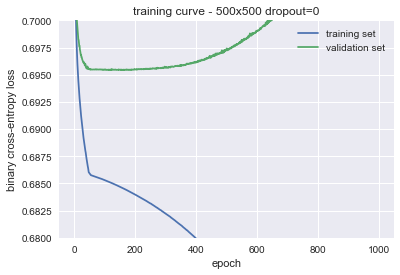

In [132]:
report_performance(BEST_MODELS[3], X_test, Y_test, prices_test, test_title, learning_curve=True)


100 dropout=0
EURUSD 2015: f1-score: 0.516, mean future return: 0.021 bps, annualized future return 1.236

100x100 dropout=0
EURUSD 2015: f1-score: 0.520, mean future return: 0.023 bps, annualized future return 1.390

500 dropout=0
EURUSD 2015: f1-score: 0.518, mean future return: 0.021 bps, annualized future return 1.166

500x500 dropout=0 epoch 1000
EURUSD 2015: f1-score: 0.516, mean future return: 0.026 bps, annualized future return 1.639

500x500 dropout=0 epoch 165
EURUSD 2015: f1-score: 0.518, mean future return: 0.021 bps, annualized future return 1.201

100x100x100 dropout=0.5
EURUSD 2015: f1-score: 0.524, mean future return: 0.025 bps, annualized future return 1.582

100x100x100 dropout=0 epoch 20
EURUSD 2015: f1-score: 0.519, mean future return: 0.024 bps, annualized future return 1.454

100x100x100 dropout=0 epoch 115
EURUSD 2015: f1-score: 0.521, mean future return: 0.026 bps, annualized future return 1.642

500x500x500 dropout=0
EURUSD 2015: f1-score: 0.518, mean future r

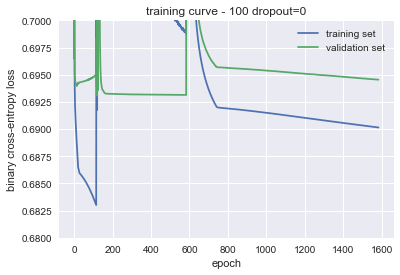

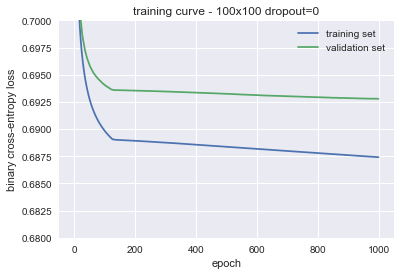

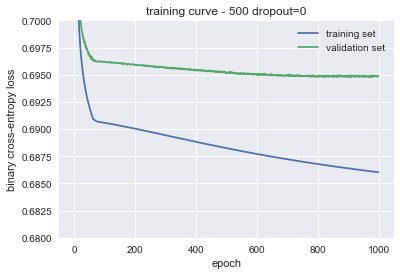

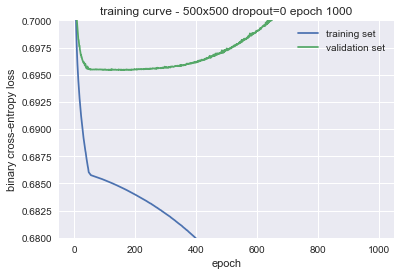

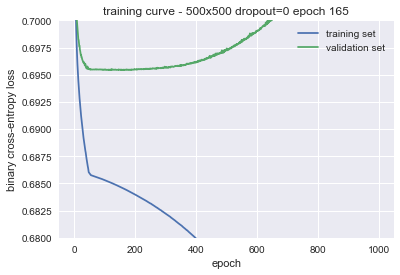

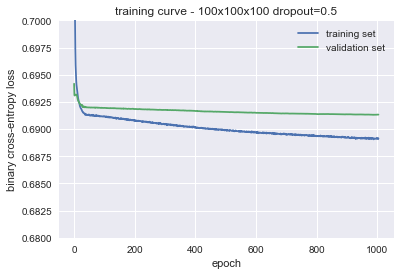

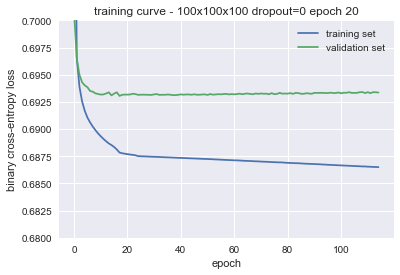

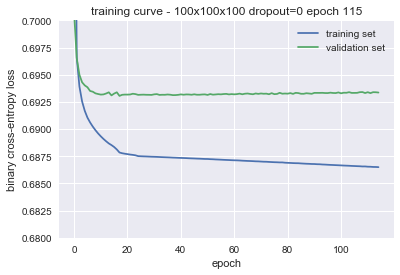

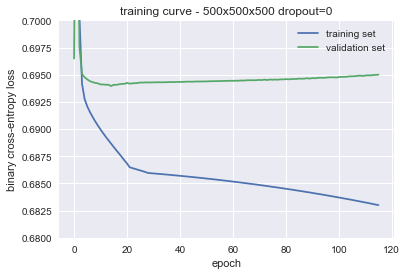

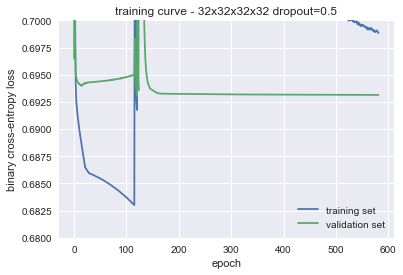

In [136]:
model_indices = range(len(BEST_MODELS))
for i in model_indices:
    print 
    report_performance(BEST_MODELS[i], X_test, Y_test, prices_test, test_title, learning_curve=True)

----------------

In [125]:
# load *training* set
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'

year=20092014
train_title = sym + " " + str(year)
X_train, Y_train, prices_train = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

In [126]:
for i in range(len(BEST_MODELS)):
    report_performance(BEST_MODELS[i], X_train, Y_train, prices_train, train_title, learning_curve=False)

100 dropout=0
EURUSD 20092014: f1-score: 0.533, mean future return: 0.043 bps, annualized future return 4.054
100x100 dropout=0
EURUSD 20092014: f1-score: 0.542, mean future return: 0.058 bps, annualized future return 7.874
500 dropout=0
EURUSD 20092014: f1-score: 0.547, mean future return: 0.074 bps, annualized future return 14.859
100x100x100 dropout=0.5
EURUSD 20092014: f1-score: 0.539, mean future return: 0.038 bps, annualized future return 3.181
100x100x100 dropout=0 epoch 20
EURUSD 20092014: f1-score: 0.540, mean future return: 0.052 bps, annualized future return 6.047
100x100x100 dropout=0 epoch 115
EURUSD 20092014: f1-score: 0.544, mean future return: 0.061 bps, annualized future return 8.883
500x500x500 dropout=0
EURUSD 20092014: f1-score: 0.539, mean future return: 0.056 bps, annualized future return 7.016
32x32x32x32 dropout=0.5
EURUSD 20092014: f1-score: 0.336, mean future return: 0.001 bps, annualized future return 0.021


----------------------------

gnb: f1-score: 0.514, mean future return: 0.021 bps, annualized future return 1.175


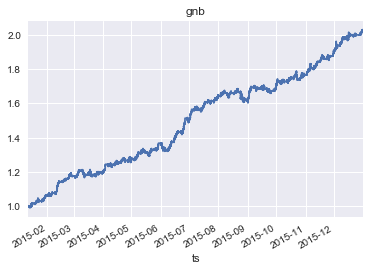

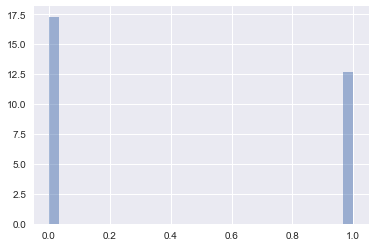

[[101721  69749]
 [ 96315  75867]]


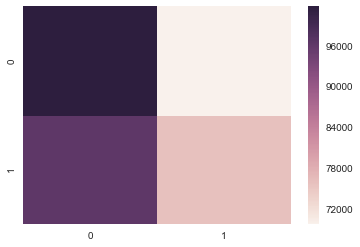

In [92]:
from sklearn.externals import joblib
gnb_model = joblib.load('./output/gnb_EURUSD_DS3_20092014.pkl') 

Y_test_pred = gnb_model.predict(X_test.as_matrix())
metrics.performance_report("gnb",  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, histogram=True, heatmap=True)

-----------------------------------------


In [ ]:
!! Idea: assess performance of 1 minute prediction over next n periods, e.g. by average signal, ewma signal.
    Versus predicting on n periods ahead directly.
    
    Increase N to point of being potentially tradeable.
    
    

In [ ]:
i_s = []
frsma = []
frewma = []
for i in range(20):
    i_s.append(i)
    fut_ret_sma = metrics.aggregated_predicted_future_return(
        prices=prices_test, prediction=Y_test_pred, agg_period=i, mode='sma').mean() *1e4
    frsma.append(fut_ret_sma)
    
    fut_ret_ewma = metrics.aggregated_predicted_future_return(
        prices=prices_test, prediction=Y_test_pred, agg_period=i, mode='ewm').mean() *1e4
    frewma.append(fut_ret_ewma)

plt.plot(i_s, frsma,'.-')
plt.plot(i_s, frewma,'.-')
    

??? why are perf charts below different to fut return charts from performance report.????

In [ ]:
fut_return_test = utils.future_return(prices_test, 1)

In [ ]:
def perf(Y, fut_ret):
    preds = Y[:,0]
    rets = fut_ret.fillna(0).values
    assert preds.shape == rets.shape
    
    cats = utils.prediction_to_category2(preds)
    # turn true/false into +1/-1
    signs = cats*2 -1 
    
    applied_rets = signs*rets / signs.std()
    ser =  pd.Series(applied_rets, index=fut_ret.index)   
    print ser.mean()/ser.std()
    return ser

In [ ]:
def perf2(Y, fut_ret):
    preds = Y[:,0]
    rets = fut_ret.fillna(0).values
    assert preds.shape == rets.shape
    
    # turn true/false into +1/-1
    signs = preds - 0.5
    
    applied_rets = signs*rets / signs.std()
    ser =  pd.Series(applied_rets, index=fut_ret.index)   
    print ser.mean()/ser.std()
    return ser

In [ ]:
def perf3(Y, fut_ret):
    preds = Y[:,0]
    rets = fut_ret.fillna(0).values
    assert preds.shape == rets.shape
    
    # turn true/false into +1/-1
    signs = (preds - 0.5)
    signs = np.tanh(signs/2)
    applied_rets = signs*rets / signs.std()
    ser =  pd.Series(applied_rets, index=fut_ret.index)   
    print ser.mean()/ser.std()
    return ser

In [ ]:
print perf(Y_test_pred, fut_return_test).sum()
print perf2(Y_test_pred, fut_return_test).sum()
print perf3(Y_test_pred, fut_return_test).sum()

In [ ]:
perf(Y_test_pred, fut_return_test).cumsum().plot(label='perf')
perf2(Y_test_pred, fut_return_test).cumsum().plot(label='perf2')
perf3(Y_test_pred, fut_return_test).cumsum().plot(label='perf3')
plt.legend()

-----------------------------------

## Control

In [ ]:
X_control, Y_control, prices_control = datasets.prepare_dataset3(df=datasets.random_ohlc(100000),lookahead=1, n_periods=25)

In [ ]:
X_test.describe()

In [ ]:
X_control.describe()

In [ ]:
Y_control_pred = model.predict(X_control.as_matrix(), batch_size=1024)
Y_control_pred_class = utils.prediction_to_category2(Y_control_pred)
metrics.performance_report("control",  prices_control,  lookahead, Y_control, Y_control_pred_class, cum_return_plot=True, heatmap=True, histogram=True)

In [ ]:
(fut_return_control.ix[~Y_control_pred_class[:,0]]+1).mean() - fut_return_control.mean() - 1